# Importing libraries

In [124]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing IRIS dataset

In [125]:
path_to_input_file = os.path.join(os.getcwd(), 'iris_data.csv')
iris_data = pd.read_csv(path_to_input_file)
iris_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Identifying missing values, if any

In [126]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [127]:
iris_data.isna().any()

sepallength    False
sepalwidth     False
petallength    False
petalwidth     False
class          False
dtype: bool

### No missing values found in the dataset

# Visualizing the dataset

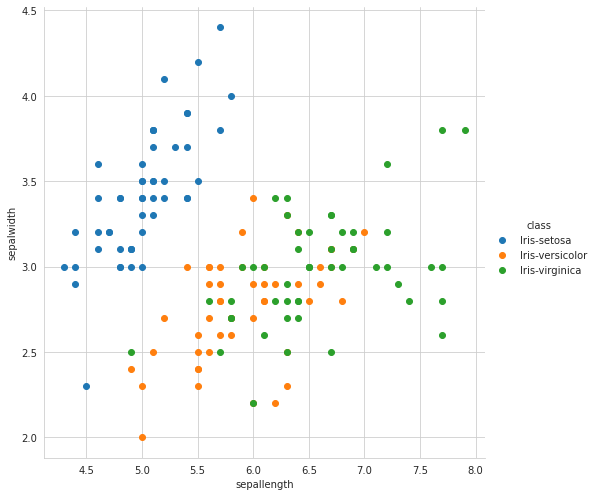

In [128]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_data, hue="class", height=7).map(plt.scatter, "sepallength", "sepalwidth").add_legend()
plt.show()

### Closely observing the plot, we can clearly see the setosa flower species(blue dots) are well separated from the other two species versicolor(orange) and virginica(green)

# Separating features and class variables

In [129]:
# Converting the class attribute which is categorical to a numeric attribute before feeding into the model
conversion_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['class'] = iris_data['class'].replace(conversion_dict)

y = iris_data['class']
iris_data_features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
X = iris_data[iris_data_features]

In [130]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [131]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Splitting test and training data

In [132]:
# the random_state argument guarantees we get the same split every time we run the cell
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

# Training a Logistic regression model for classification

In [133]:
model = LogisticRegression(solver='liblinear', C=10.0, multi_class='ovr', random_state=0)
model.fit(train_X, train_y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Calculating model accuracy on training and test data

In [134]:
predicted_y = model.predict(test_X)

In [135]:
print(f"Accuracy of the model on training data is {model.score(train_X, train_y)}")

Accuracy of the model on training data is 0.9910714285714286


In [136]:
print(f"Accuracy of the model on test data is {model.score(test_X, test_y)}")

Accuracy of the model on test data is 0.9210526315789473


# Confusion Matrix

In [137]:
cm = confusion_matrix(test_y, predicted_y)

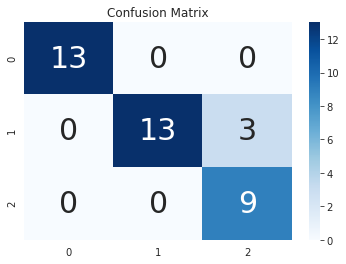

In [138]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Plotting Decision Boundary

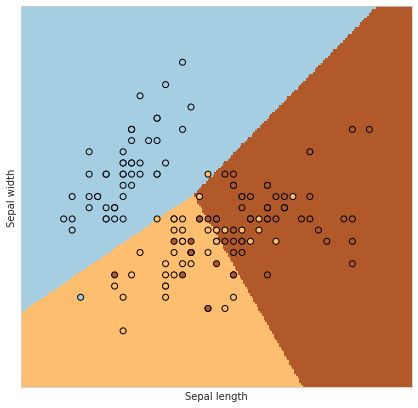

In [139]:
x_min, x_max = iris_data['sepallength'].min() - .5, iris_data['sepallength'].max() + .5
y_min, y_max = iris_data['sepalwidth'].min() - .5, iris_data['sepalwidth'].max() + .5
h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
model.fit(iris_data[iris_data_features[:2]], iris_data['class'])
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(iris_data['sepallength'], iris_data['sepalwidth'], c=iris_data['class'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()